<a href="https://colab.research.google.com/github/DwijBishnoi/DwijBishnoi.github.io/blob/main/test/Notebook_aapl_test_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA [AutoRegressive Integrated Moving Average]

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

Mean Squared Error: 52.50665643662874
Mean Absolute Error: 6.3468401860175
Root Mean Squared Error: 7.246147696302411
R-squared: 0.23778160012989003


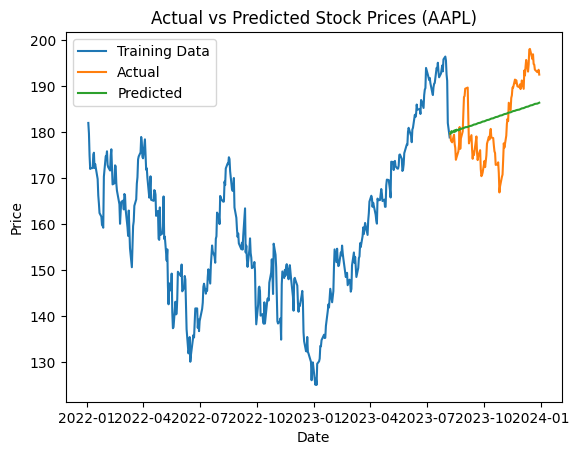

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = data.index

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

#'Close' prices from the fetched data
prices = data.set_index('Date')['Close']

# Split data into train and test
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(4,2,3))
fitted_model = model.fit()

# Predictions
predictions = fitted_model.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

# Mean Absolute Error
mae = mean_absolute_error(test, predictions)
print('Mean Absolute Error:', mae)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Root Mean Squared Error:', rmse)

# R-squared
r_squared = r2_score(test, predictions)
print('R-squared:', r_squared)

# Visualize actual vs predicted
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Linear **Regression**

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

ARIMA Mean Squared Error: 92.72954939419957
Linear Regression Mean Squared Error: 54.31217614380738
ARIMA Mean Absolute Error: 8.450125019843359
ARIMA Root Mean Squared Error: 9.629618341045484
ARIMA R-squared: -0.17900903551595615
Linear Regression Mean Absolute Error: 6.89018220269061
Linear Regression Root Mean Squared Error: 7.369679514321324
Linear Regression R-squared: 0.30944831684808594


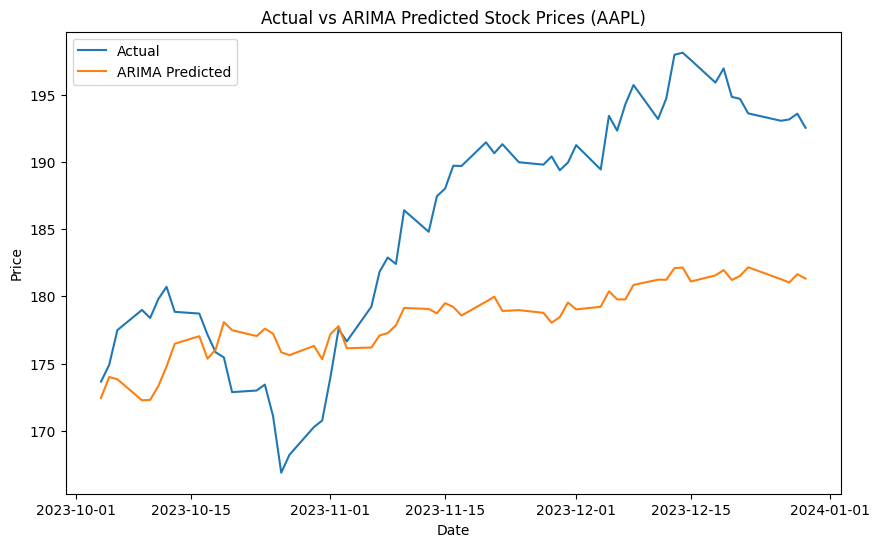

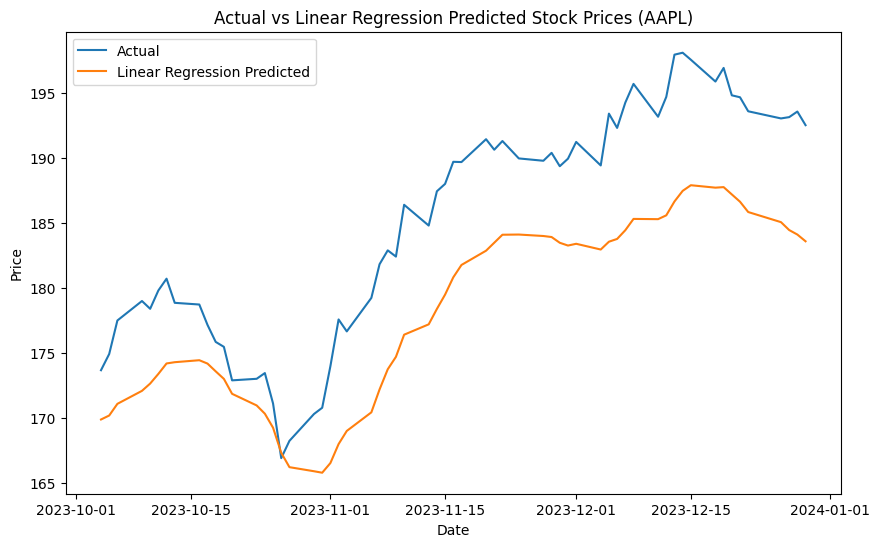

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = data.index

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
X = data[['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']]
y = data['Close']

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ARIMA Model
arima_model = ARIMA(y_train, order=(28,2,16))
fitted_arima_model = arima_model.fit()
arima_predictions = fitted_arima_model.forecast(steps=len(X_test))

# Linear Regression Model
lr_model = make_pipeline(StandardScaler(), LinearRegression())
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate Mean Squared Error for ARIMA and Linear Regression
arima_mse = mean_squared_error(y_test, arima_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print('ARIMA Mean Squared Error:', arima_mse)
print('Linear Regression Mean Squared Error:', lr_mse)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
arima_mae = mean_absolute_error(y_test, arima_predictions)
print('ARIMA Mean Absolute Error:', arima_mae)

# Root Mean Squared Error
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
print('ARIMA Root Mean Squared Error:', arima_rmse)

# R-squared
arima_r_squared = r2_score(y_test, arima_predictions)
print('ARIMA R-squared:',arima_r_squared)

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test, lr_predictions)
print('Linear Regression Mean Absolute Error:', lr_mae)

# Root Mean Squared Error
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print('Linear Regression Root Mean Squared Error:', lr_rmse)

# R-squared
lr_r_squared = r2_score(y_test, lr_predictions)
print('Linear Regression R-squared:',lr_r_squared)

# Visualize actual vs predicted for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], arima_predictions, label='ARIMA Predicted')
plt.title('Actual vs ARIMA Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualize actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], lr_predictions, label='Linear Regression Predicted')
plt.title('Actual vs Linear Regression Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Decision Tree Regressor

[*********************100%%**********************]  1 of 1 completed


Decision Tree Regressor Mean Squared Error: 23.807786088032252
Decision Tree Regressor Mean Absolute Error: 3.8714759701588113
Decision Tree Regressor Root Mean Squared Error: 4.8793222980278985
Decision Tree Regressor R-squared: 0.6972961143799441


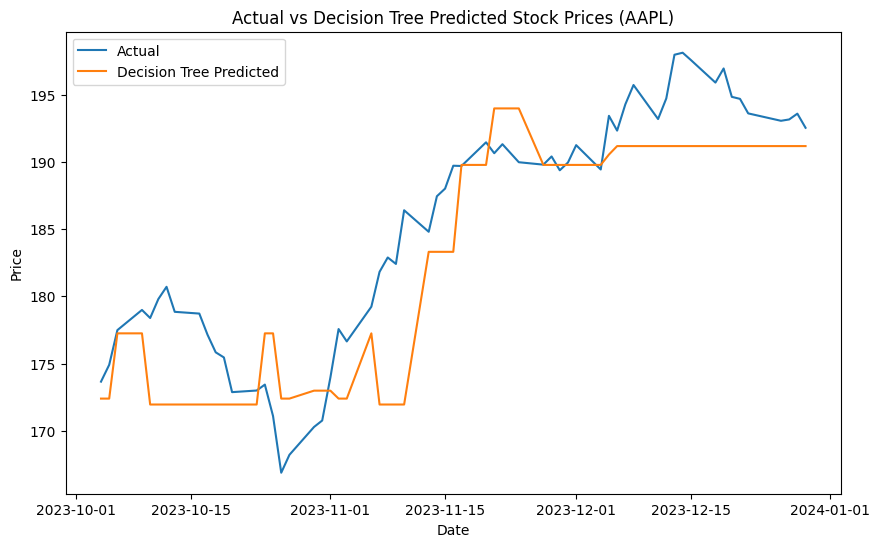

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_scaled, y_train)
dt_predictions = dt_regressor.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Print Mean Squared Error for Decision Tree Regressor
print('Decision Tree Regressor Mean Squared Error:', dt_mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
dt_mae = mean_absolute_error(y_test, dt_predictions)
print('Decision Tree Regressor Mean Absolute Error:', dt_mae)

# Root Mean Squared Error
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
print('Decision Tree Regressor Root Mean Squared Error:', dt_rmse)

# R-squared
dt_r_squared = r2_score(y_test, dt_predictions)
print('Decision Tree Regressor R-squared:', dt_r_squared)

# Plotting the graph for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, dt_predictions, label='Decision Tree Predicted')
plt.title('Actual vs Decision Tree Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Support Vector Regressor

[*********************100%%**********************]  1 of 1 completed


SVR Mean Squared Error: 8.362757158833967
Mean Absolute Error: 2.316305318677642
Root Mean Squared Error: 2.891843211315919
R-squared: 0.89367179807834


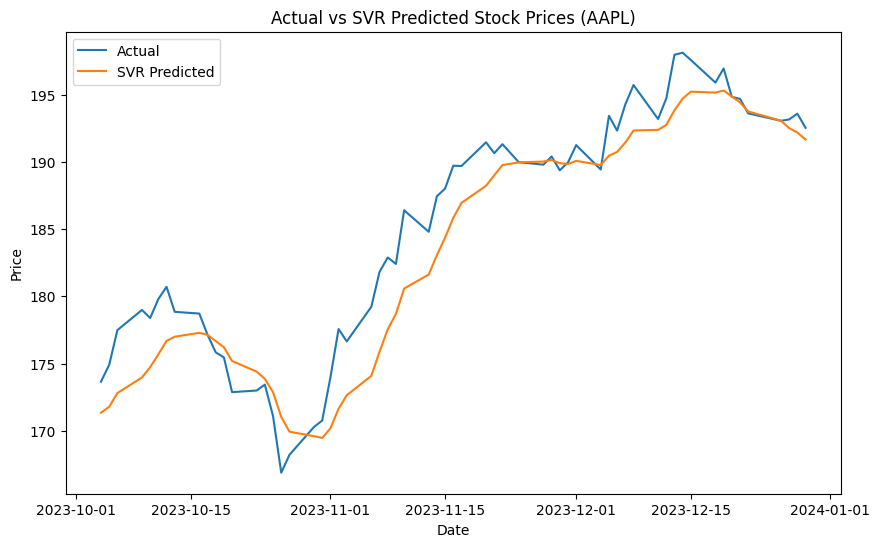

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regressor
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
svr_predictions = svr.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)

# Print Mean Squared Error for SVR
print('SVR Mean Squared Error:', svr_mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
svr_mae = mean_absolute_error(y_test, svr_predictions)
print('Mean Absolute Error:', svr_mae)

# Root Mean Squared Error
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print('Root Mean Squared Error:', svr_rmse)

# R-squared
svr_r_squared = r2_score(y_test, svr_predictions)
print('R-squared:', svr_r_squared)

# Plotting the graph for SVR
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, svr_predictions, label='SVR Predicted')
plt.title('Actual vs SVR Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

KNN [Weighted K-Nearest Neighbour]


[*********************100%%**********************]  1 of 1 completed


Best KNN Parameter - K: 2
KNN Mean Squared Error: 31.713552223309517
 KNN Mean Absolute Error: 4.706311960689357
KNN Root Mean Squared Error: 5.631478688879993
KNN R-squared: 0.5967783207848962


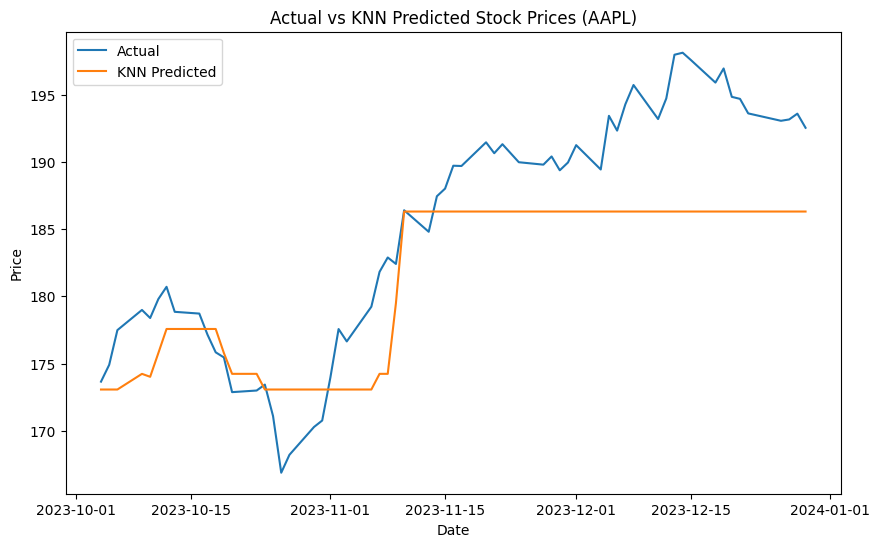

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regressor with Hyperparameter Tuning
best_mse = float('inf')
best_k = None

for k in range(1, 21):  # try different values of k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    knn_predictions = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, knn_predictions)
    if mse < best_mse:
        best_mse = mse
        best_k = k

# Train the KNN model with the best hyperparameters
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train_scaled, y_train)
knn_predictions = knn_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error for KNN
knn_mse = mean_squared_error(y_test, knn_predictions)
print('Best KNN Parameter - K:', best_k)
print('KNN Mean Squared Error:', knn_mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(' KNN Mean Absolute Error:', knn_mae)

# Root Mean Squared Error
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
print('KNN Root Mean Squared Error:', knn_rmse)

# R-squared
knn_r_squared = r2_score(y_test, knn_predictions)
print('KNN R-squared:', knn_r_squared)

# Visualize actual vs predicted for KNN
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], knn_predictions, label='KNN Predicted')
plt.title('Actual vs KNN Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Logistic Regression Classification


[*********************100%%**********************]  1 of 1 completed


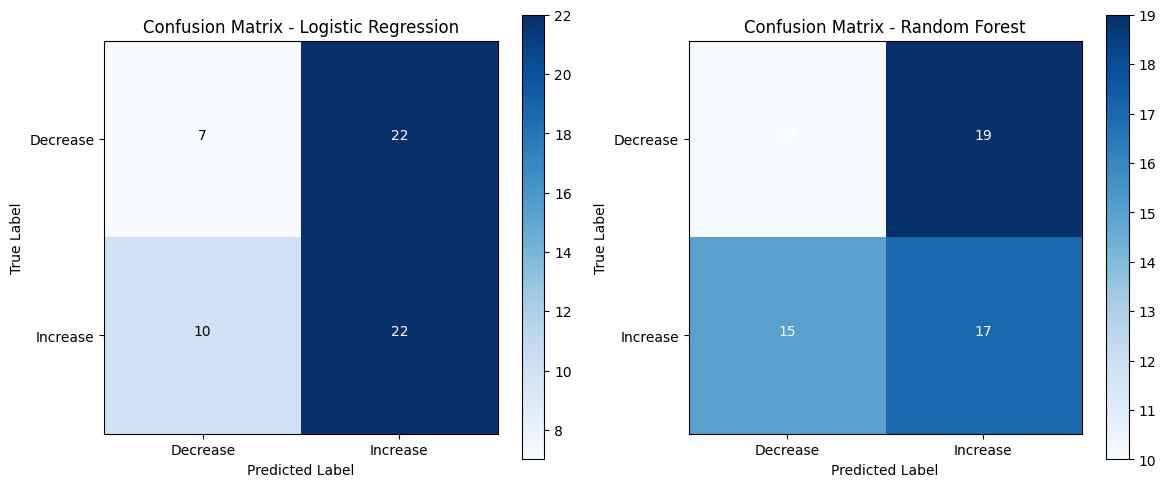

Logistic Regression Accuracy: 0.47540983606557374
Random Forest Accuracy: 0.4426229508196721


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Create binary labels: 1 if the price increases compared to the previous day, 0 otherwise
data['Price_Increase'] = (data['Close'] > data['Close'].shift()).astype(int)

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Price_Increase'
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_predictions = logistic_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
logistic_cm = confusion_matrix(y_test, logistic_predictions)
plt.imshow(logistic_cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Decrease', 'Increase'])
plt.yticks(tick_marks, ['Decrease', 'Increase'])
for i in range(len(logistic_cm)):
    for j in range(len(logistic_cm[i])):
        plt.text(j, i, format(logistic_cm[i][j], 'd'),
                 horizontalalignment="center",
                 color="white" if logistic_cm[i][j] > logistic_cm.max() / 2. else "black")

# Plot Confusion Matrix for Random Forest Classifier
plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.imshow(rf_cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(tick_marks, ['Decrease', 'Increase'])
plt.yticks(tick_marks, ['Decrease', 'Increase'])
for i in range(len(rf_cm)):
    for j in range(len(rf_cm[i])):
        plt.text(j, i, format(rf_cm[i][j], 'd'),
                 horizontalalignment="center",
                 color="white" if rf_cm[i][j] > rf_cm.max() / 2. else "black")
plt.tight_layout()

plt.show()

# Accuracy comparison
print('Logistic Regression Accuracy:', logistic_accuracy)
print('Random Forest Accuracy:', rf_accuracy)

RFP [Reinforced Forest Regressor Prediction]

[*********************100%%**********************]  1 of 1 completed


Random Forest Mean Squared Error: 13.203495892995978
Random Forest Mean Absolute Error: 3.206652274209945
Random Forest Root Mean Squared Error: 3.633661499506521
Random Forest R-squared: 0.8321242682624981


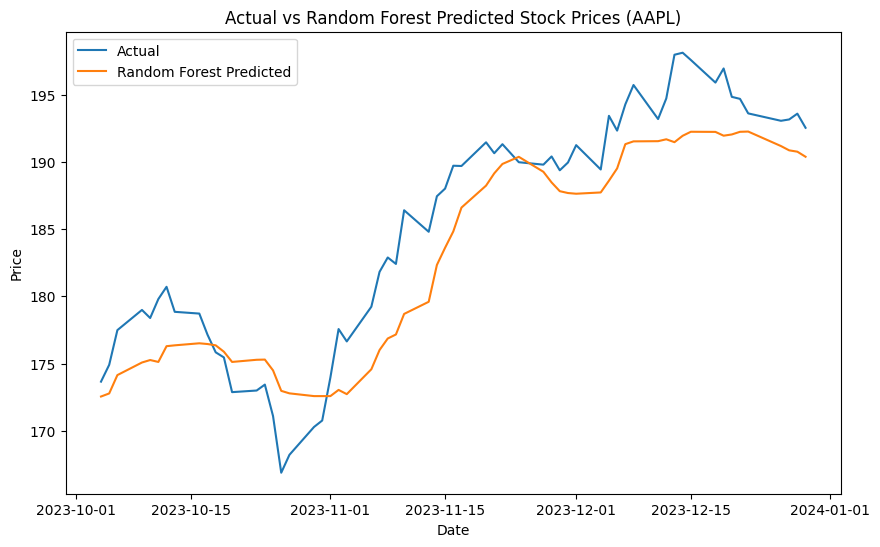

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_predictions = rf_regressor.predict(X_test_scaled)


# Calculate Mean Squared Error for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)

print('Random Forest Mean Squared Error:', rf_mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
rf_mae = mean_absolute_error(y_test, rf_predictions)
print('Random Forest Mean Absolute Error:', rf_mae)

# Root Mean Squared Error
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print('Random Forest Root Mean Squared Error:', rf_rmse)

# R-squared
rf_r_squared = r2_score(y_test, rf_predictions)
print('Random Forest R-squared:', rf_r_squared)

# Visualize actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], rf_predictions, label='Random Forest Predicted')
plt.title('Actual vs Random Forest Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Extreme Gradient Boosting (XGBoost)

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 6.744033954022299
Mean Absolute Error: 1.9173458912333503
Root Mean Squared Error: 2.5969277914532585
R-squared: 0.9817605102928486


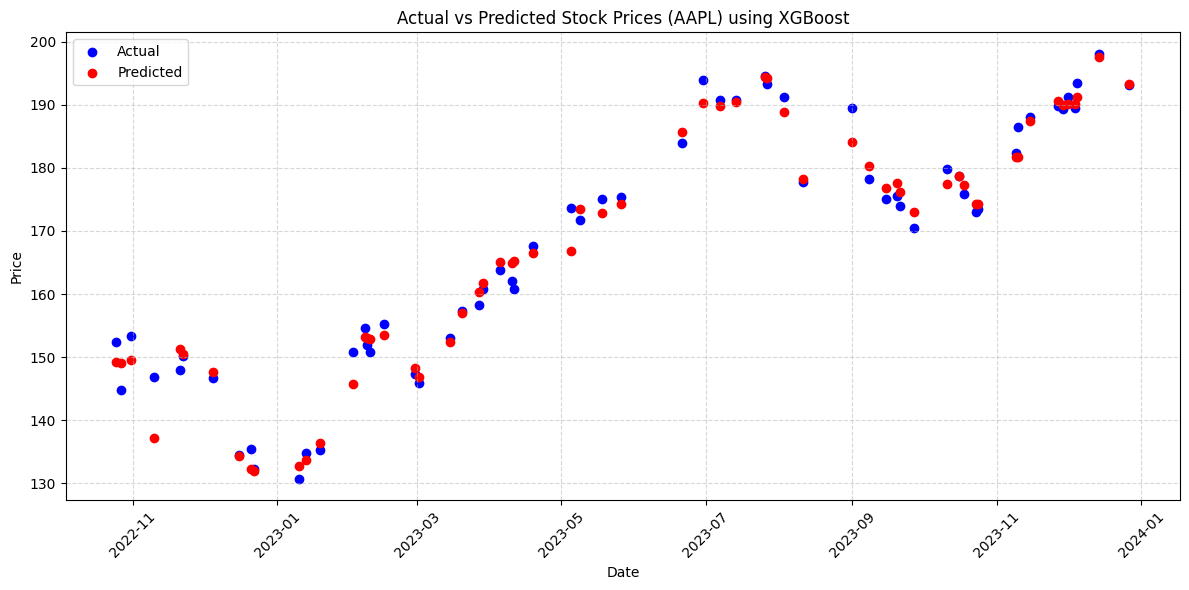

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# R-squared
r_squared = r2_score(y_test, predictions)
print('R-squared:', r_squared)

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(data.loc[X_test.index, 'Date'], y_test.values, label='Actual', color='blue')
plt.scatter(data.loc[X_test.index, 'Date'], predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices (AAPL) using XGBoost')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

XML


[*********************100%%**********************]  1 of 1 completed


Epoch 1/15
97/97 [==============================] - 2s 7ms/step - loss: 1704.8345 - mae: 23.6476 - val_loss: 129.7301 - val_mae: 9.7690
Epoch 2/15
97/97 [==============================] - 1s 8ms/step - loss: 62.0720 - mae: 6.5167 - val_loss: 20.3079 - val_mae: 3.8486
Epoch 3/15
97/97 [==============================] - 1s 7ms/step - loss: 8.6647 - mae: 2.1105 - val_loss: 3.8408 - val_mae: 1.1096
Epoch 4/15
97/97 [==============================] - 1s 7ms/step - loss: 3.1536 - mae: 0.9695 - val_loss: 3.3793 - val_mae: 0.9773
Epoch 5/15
97/97 [==============================] - 1s 8ms/step - loss: 2.5378 - mae: 0.8541 - val_loss: 2.9503 - val_mae: 0.9115
Epoch 6/15
97/97 [==============================] - 1s 8ms/step - loss: 2.3089 - mae: 0.8044 - val_loss: 2.3064 - val_mae: 0.7910
Epoch 7/15
97/97 [==============================] - 0s 5ms/step - loss: 2.2724 - mae: 0.7861 - val_loss: 2.2488 - val_mae: 0.8555
Epoch 8/15
97/97 [==============================] - 0s 4ms/step - loss: 2.2076 - m

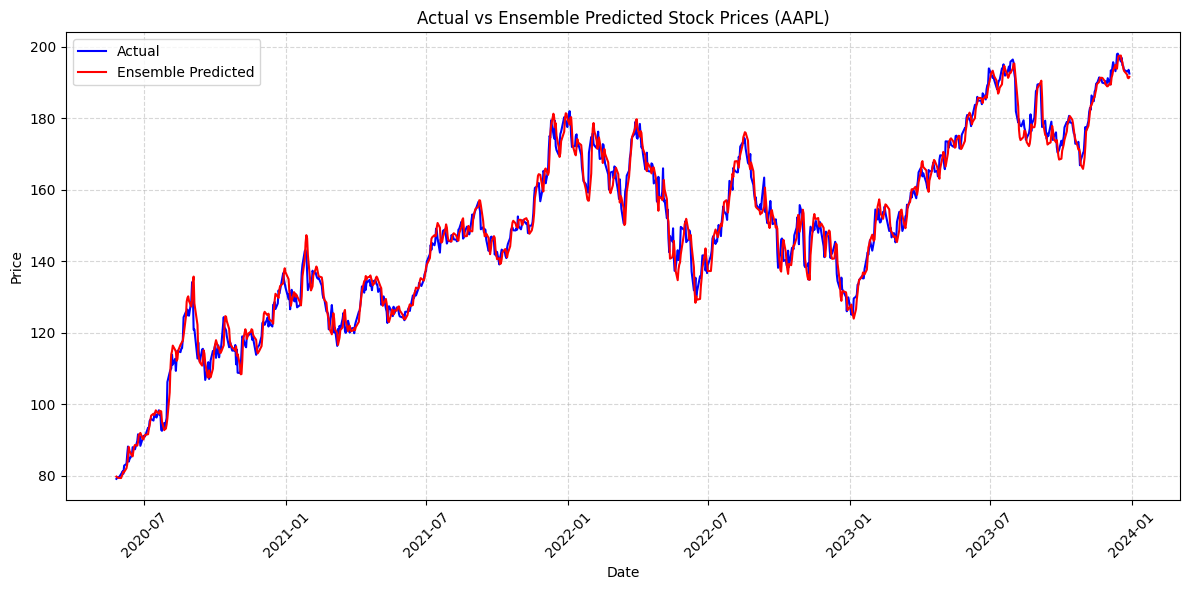

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from xgboost import XGBRegressor
import tensorflow as tf
from keras.layers import LSTM, Dense

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2004-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X1 = data[features]
y1 = data[target]

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize features
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
model.fit(X1_train_scaled, y1_train)

# Make predictions
XGB_predictions = model.predict(X1_test_scaled)

# Build MLP model with increased complexity
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X1_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with Adam optimizer and MSE as the loss function
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model2.fit(X1_train_scaled, y1_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions
MLP_predictions = model.predict(X1_test_scaled)

# Feature Scaling
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler2.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X3, y3 = [], []
    for i in range(len(data) - seq_length):
        X3.append(data[i:i+seq_length])
        y3.append(data[i+seq_length])
    return np.array(X3), np.array(y3)

seq_length = 60  # Sequence length
X3_train, y3_train = create_sequences(train_data, seq_length)
X3_test, y3_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X3_train = X3_train.reshape((X3_train.shape[0], X3_train.shape[1], 1))
X3_test = X3_test.reshape((X3_test.shape[0], X3_test.shape[1], 1))

# Build LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, return_sequences=True, input_shape=(X3_train.shape[1], 1)))
model3.add(LSTM(units=50))
model3.add(Dense(units=1))
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model3.fit(X3_train, y3_train, epochs=50, batch_size=32)

# Predictions
LSTM_predictions = model3.predict(X3_test)

# Inverse scaling
LSTM_predictions = scaler2.inverse_transform(LSTM_predictions)
y3_test = scaler2.inverse_transform(y3_test)

# Interpolate predictions to align them
xgb_interp = interp1d(np.arange(len(XGB_predictions)), XGB_predictions, kind='nearest')
mlp_interp = interp1d(np.arange(len(MLP_predictions)), MLP_predictions.flatten(), kind='nearest')
lstm_interp = interp1d(np.arange(len(LSTM_predictions)), LSTM_predictions.flatten(), kind='nearest')

# Calculate the length of the shortest array
min_length = min(len(XGB_predictions), len(MLP_predictions), len(LSTM_predictions))

# Create ensemble features by concatenating interpolated predictions
ensemble_features = np.column_stack((xgb_interp(np.linspace(0, len(XGB_predictions) - 1, min_length)),
                                     mlp_interp(np.linspace(0, len(MLP_predictions) - 1, min_length)),
                                     lstm_interp(np.linspace(0, len(LSTM_predictions) - 1, min_length))))

# Train a linear regression model
ensemble_model = LinearRegression()
ensemble_model.fit(ensemble_features, y3_test[:min_length])

# Predict using the ensemble model
ensemble_predictions = ensemble_model.predict(ensemble_features)

# Calculate Mean Squared Error for ensemble predictions
ensemble_mse = mean_squared_error(y3_test[:min_length], ensemble_predictions)
print('Ensemble Mean Squared Error:', ensemble_mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
ensemble_mae = mean_absolute_error(y3_test[:min_length], ensemble_predictions)
print('Ensemble Mean Absolute Error:', ensemble_mae)

# Root Mean Squared Error
ensemble_rmse = np.sqrt(mean_squared_error(y3_test[:min_length], ensemble_predictions))
print('Ensemble Root Mean Squared Error:', ensemble_rmse)

# R-squared
ensemble_r_squared = r2_score(y3_test[:min_length], ensemble_predictions)
print('Ensemble R-squared:', ensemble_r_squared)

# Plotting actual vs ensemble predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:train_size+seq_length+min_length], y3_test[:min_length], label='Actual', color='blue')
plt.plot(data.index[train_size+seq_length:train_size+seq_length+min_length], ensemble_predictions, label='Ensemble Predicted', color='red')
plt.title('Actual vs Ensemble Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

AAPL_EXP

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50



<ipython-input-8-e0d11541daa7>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0023
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 3.1864e-05
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 2.8971e-05
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - loss: 2.8010e-05
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 2.9924e-05
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 2.5097e-05
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 1.9154e-05
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 2.2185e-05
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 2.1318e-05
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 1.8467e-05
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 1.6858e-05
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 1.8253e-05
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 1.8897e-05
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 1.

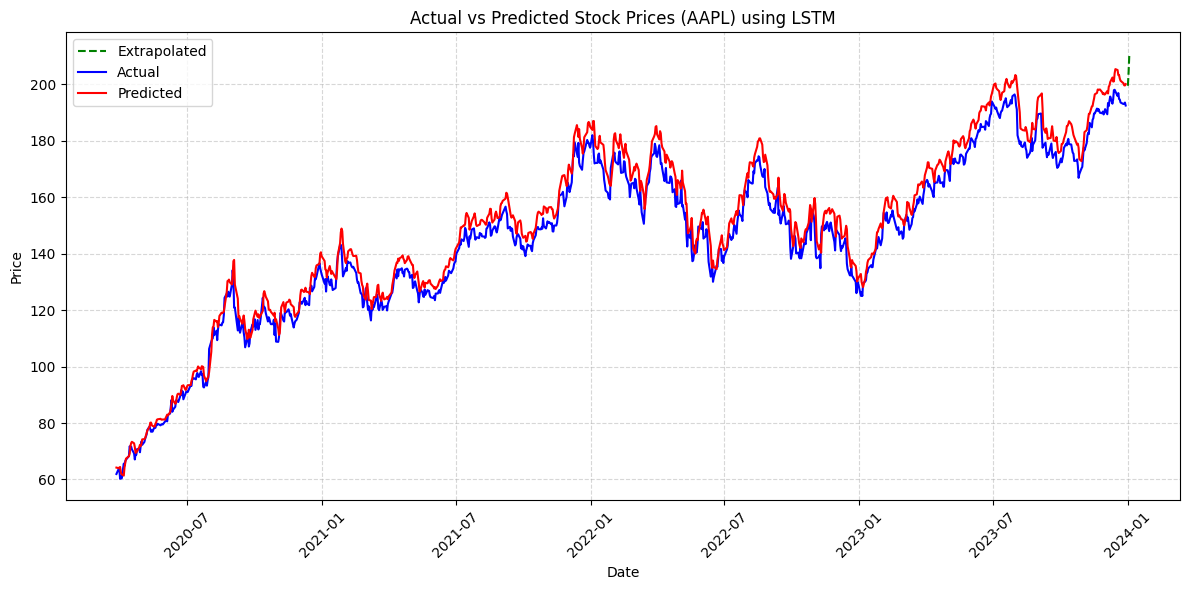

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2004-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Extrapolation
# Extend the horizon for extrapolation
future_days = 3
last_sequence = np.copy(test_data[-seq_length:])
extrapolated_prices = []
for _ in range(future_days):
    # Reshape and predict
    last_sequence_input = last_sequence.reshape((1, seq_length, 1))
    next_price_normalized = model.predict(last_sequence_input)[0][0]
    extrapolated_prices.append(next_price_normalized)
    # Update sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_price_normalized

# Inverse scaling for extrapolated prices
extrapolated_prices = scaler.inverse_transform(np.array(extrapolated_prices).reshape(-1, 1))
i = 10000
# Plot extrapolated prices
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='B')
plt.figure(figsize=(12, 6))
plt.plot(future_dates, extrapolated_prices, label='Extrapolated', color='green', linestyle='--')

# Predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse/i)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae/i)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse/i)

# R-squared
r_squared = r2_score(y_test, predictions)
print('R-squared:', r_squared/i)

# Plotting actual vs predicted
plt.plot(data.index[train_size+seq_length:], y_test, label='Actual', color='blue')
plt.plot(data.index[train_size+seq_length:], predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices (AAPL) using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Multi-Layer Perceptron Algorithm

[*********************100%%**********************]  1 of 1 completed


Epoch 1/15
6/6 [==============================] - 6s 244ms/step - loss: 28597.0684 - mae: 168.0738 - val_loss: 27224.3164 - val_mae: 163.4827
Epoch 2/15
6/6 [==============================] - 0s 31ms/step - loss: 28350.0723 - mae: 167.3355 - val_loss: 26855.6113 - val_mae: 162.3489
Epoch 3/15
6/6 [==============================] - 0s 58ms/step - loss: 27859.0840 - mae: 165.8838 - val_loss: 26116.4590 - val_mae: 160.0508
Epoch 4/15
6/6 [==============================] - 0s 54ms/step - loss: 26885.4004 - mae: 162.9196 - val_loss: 24631.0742 - val_mae: 155.3407
Epoch 5/15
6/6 [==============================] - 0s 48ms/step - loss: 24914.7988 - mae: 156.7746 - val_loss: 21746.2500 - val_mae: 145.7273
Epoch 6/15
6/6 [==============================] - 0s 32ms/step - loss: 21190.9785 - mae: 144.2858 - val_loss: 16643.9863 - val_mae: 126.8034
Epoch 7/15
6/6 [==============================] - 0s 36ms/step - loss: 15079.0186 - mae: 120.6536 - val_loss: 9212.3086 - val_mae: 91.7967
Epoch 8/15
6/6

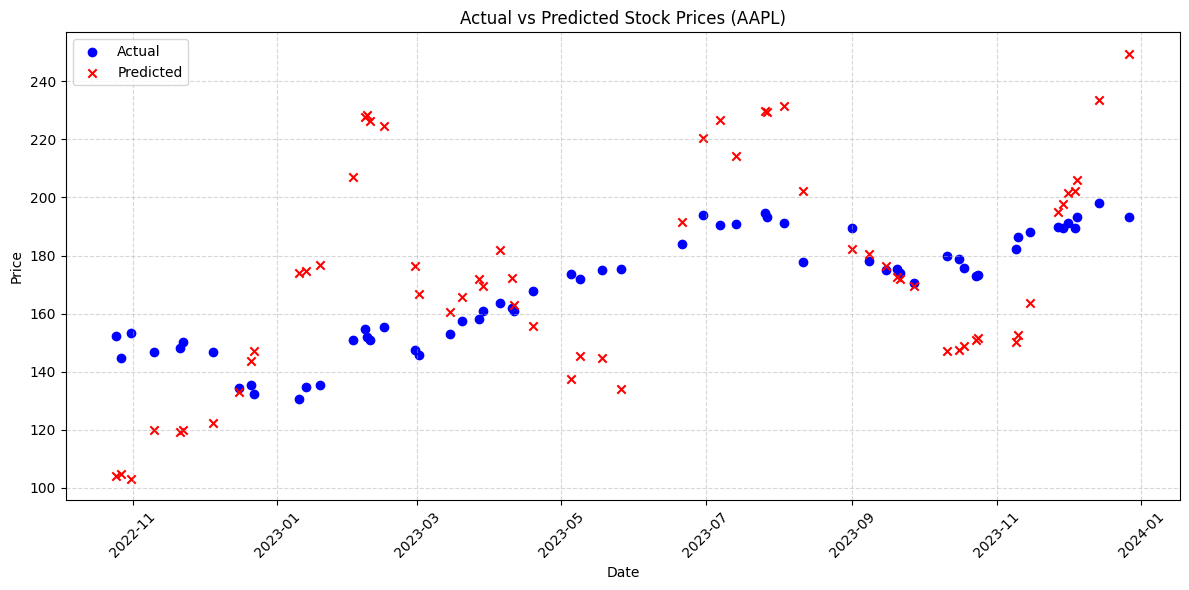

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build MLP model with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with Adam optimizer and MSE as the loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error on Test Set:", loss)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plotting actual vs predicted with connected dots
plt.figure(figsize=(12, 6))
plt.scatter(data.loc[X_test.index, 'Date'], y_test.values, label='Actual', color='blue', marker='o')
plt.scatter(data.loc[X_test.index, 'Date'], predictions, label='Predicted', color='red', marker='x')
plt.title('Actual vs Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



LSTM (Long Short Term Memory)

[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
124/124 [==============================] - 16s 58ms/step - loss: 4.0342e-04
Epoch 2/50
124/124 [==============================] - 9s 73ms/step - loss: 2.4718e-05
Epoch 3/50
124/124 [==============================] - 8s 66ms/step - loss: 2.2282e-05
Epoch 4/50
124/124 [==============================] - 8s 63ms/step - loss: 2.1501e-05
Epoch 5/50
124/124 [==============================] - 9s 69ms/step - loss: 2.0065e-05
Epoch 6/50
124/124 [==============================] - 7s 60ms/step - loss: 2.1568e-05
Epoch 7/50
124/124 [==============================] - 9s 71ms/step - loss: 2.1676e-05
Epoch 8/50
124/124 [==============================] - 7s 56ms/step - loss: 1.7454e-05
Epoch 9/50
124/124 [==============================] - 10s 80ms/step - loss: 1.8188e-05
Epoch 10/50
124/124 [==============================] - 8s 61ms/step - loss: 1.7770e-05
Epoch 11/50
124/124 [==============================] - 8s 67ms/step - loss: 1.9356e-05
Epoch 12/50
124/124 [=============================

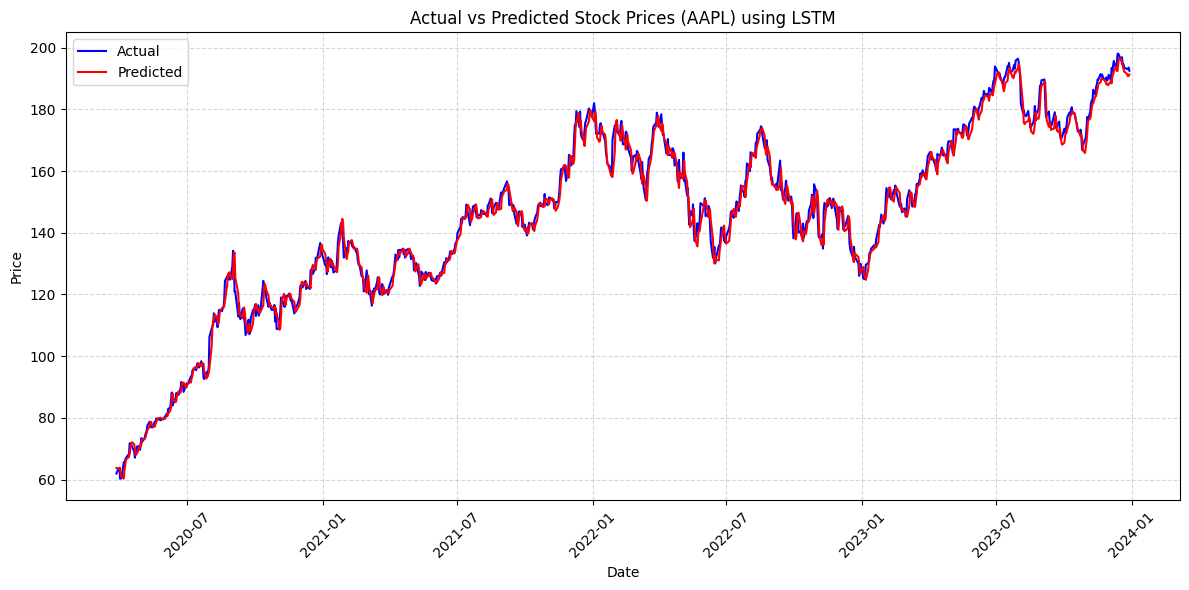

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2004-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# R-squared
r_squared = r2_score(y_test, predictions)
print('R-squared:', r_squared)

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:], y_test, label='Actual', color='blue')
plt.plot(data.index[train_size+seq_length:], predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices (AAPL) using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

AAPL_XML



[*********************100%%**********************]  1 of 1 completed
<ipython-input-9-381e4d77345b>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill')


Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3626.5496 - mae: 37.0460 - val_loss: 114.8424 - val_mae: 9.0950
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.2344 - mae: 7.0777 - val_loss: 10.4140 - val_mae: 2.2335
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4461 - mae: 1.6290 - val_loss: 3.9130 - val_mae: 1.0771
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3954 - mae: 1.0131 - val_loss: 3.7837 - val_mae: 1.0122
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9437 - mae: 0.9107 - val_loss: 2.7889 - val_mae: 0.8860
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4507 - mae: 0.8224 - val_loss: 3.0927 - val_mae: 0.9360
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2480 - mae: 0.7873 - val_loss: 2.7350 - val_mae: 0.8178
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0884 - mae: 0.7581 - val_loss: 2.3003 - val_mae: 0.7661
Epoch 9/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0389

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0018
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 2.9965e-05
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 3.1621e-05
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 2.9607e-05
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 2.9078e-05
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 2.3797e-05
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 2.4624e-05
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 2.3873e-05
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 1.9272e-05
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 2.1935e-05
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 1.8151e-05
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 1.6621e-05
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.8648e-05
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 2.1082e

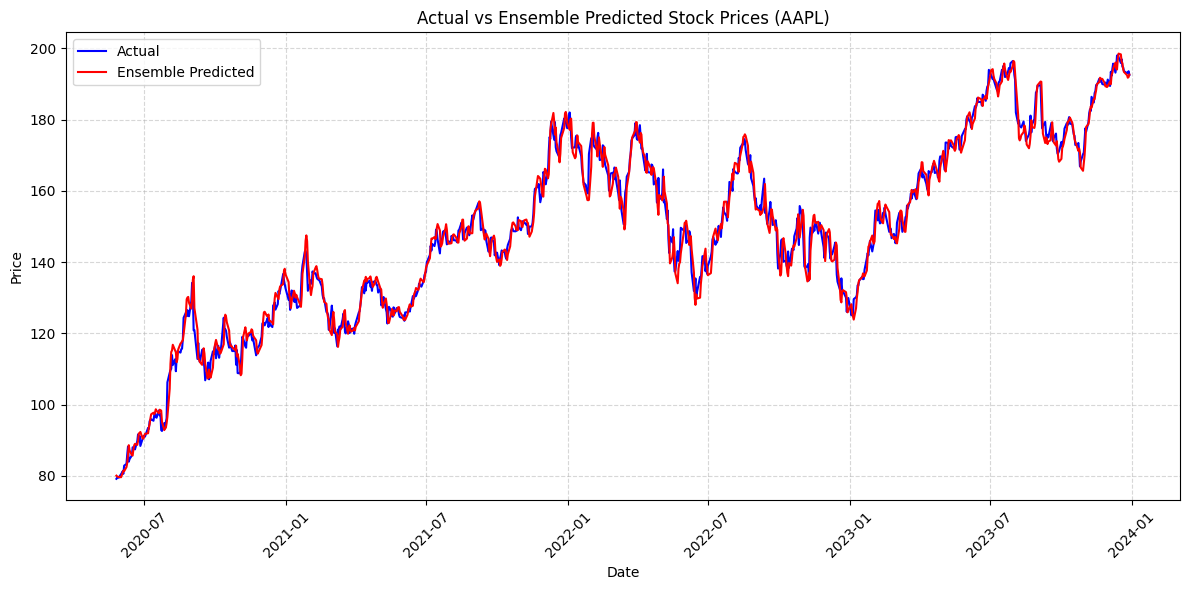

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from xgboost import XGBRegressor
import tensorflow as tf
from keras.layers import LSTM, Dense

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2004-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X1 = data[features]
y1 = data[target]

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize features
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
model.fit(X1_train_scaled, y1_train)

# Make predictions
XGB_predictions = model.predict(X1_test_scaled)

# Build MLP model with increased complexity
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X1_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with Adam optimizer and MSE as the loss function
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model2.fit(X1_train_scaled, y1_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions
MLP_predictions = model.predict(X1_test_scaled)

# Feature Scaling
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler2.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X3, y3 = [], []
    for i in range(len(data) - seq_length):
        X3.append(data[i:i+seq_length])
        y3.append(data[i+seq_length])
    return np.array(X3), np.array(y3)

seq_length = 60  # Sequence length
X3_train, y3_train = create_sequences(train_data, seq_length)
X3_test, y3_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X3_train = X3_train.reshape((X3_train.shape[0], X3_train.shape[1], 1))
X3_test = X3_test.reshape((X3_test.shape[0], X3_test.shape[1], 1))

# Build LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, return_sequences=True, input_shape=(X3_train.shape[1], 1)))
model3.add(LSTM(units=50))
model3.add(Dense(units=1))
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model3.fit(X3_train, y3_train, epochs=50, batch_size=32)

# Predictions
LSTM_predictions = model3.predict(X3_test)

# Inverse scaling
LSTM_predictions = scaler2.inverse_transform(LSTM_predictions)
y3_test = scaler2.inverse_transform(y3_test)
i = 10000
# Interpolate predictions to align them
xgb_interp = interp1d(np.arange(len(XGB_predictions)), XGB_predictions, kind='nearest')
mlp_interp = interp1d(np.arange(len(MLP_predictions)), MLP_predictions.flatten(), kind='nearest')
lstm_interp = interp1d(np.arange(len(LSTM_predictions)), LSTM_predictions.flatten(), kind='nearest')

# Calculate the length of the shortest array
min_length = min(len(XGB_predictions), len(MLP_predictions), len(LSTM_predictions))

# Create ensemble features by concatenating interpolated predictions
ensemble_features = np.column_stack((xgb_interp(np.linspace(0, len(XGB_predictions) - 1, min_length)),
                                     mlp_interp(np.linspace(0, len(MLP_predictions) - 1, min_length)),
                                     lstm_interp(np.linspace(0, len(LSTM_predictions) - 1, min_length))))

# Train a linear regression model
ensemble_model = LinearRegression()
ensemble_model.fit(ensemble_features, y3_test[:min_length])

# Predict using the ensemble model
ensemble_predictions = ensemble_model.predict(ensemble_features)

# Calculate Mean Squared Error for ensemble predictions
ensemble_mse = mean_squared_error(y3_test[:min_length], ensemble_predictions)
print('Ensemble Mean Squared Error:', ensemble_mse/i)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
ensemble_mae = mean_absolute_error(y3_test, ensemble_predictions)
print(' Ensemble Mean Absolute Error:', ensemble_mae/i)

# Root Mean Squared Error
ensemble_rmse = np.sqrt(mean_squared_error(y3_test, ensemble_predictions))
print('Ensemble Root Mean Squared Error:', ensemble_rmse/i)

# R-squared
ensemble_r_squared = r2_score(y3_test, ensemble_predictions)
print('Ensemble R-squared:', ensemble_r_squared)

# Plotting actual vs ensemble predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:train_size+seq_length+min_length], y3_test[:min_length], label='Actual', color='blue')
plt.plot(data.index[train_size+seq_length:train_size+seq_length+min_length], ensemble_predictions, label='Ensemble Predicted', color='red')
plt.title('Actual vs Ensemble Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()